# ADAcadabras Milestone 3

***This notebook resumes the work and data-pipeline achieved for Milestone 3, including Milestone 2.***

***The beginning of this Notebook consists in our Milestone 2 notebook, which contains the main methods used to deal with the raw data, process it, and extract the main figures which will let us conduct our analysis. The second part addresses the progress made since the Milestone 2 and analyses in depth the datasets constructed for Milestone 2, which helped us build our datastory.***

## General Information

As you will see, this notebook only loads and analyses the data from year 2020, considering it as the smallest dataset. Running the notebook as a TA for all years would constitute a large chunk of time, which is why the notebook will only address 2020.

***Libraries used:***
- python=3.8.12
- pandas
- datetime
- time
- matplotlib
- seaborn
- scipy
- pickle
- bz2
- json

***Files and directories to make this notebook run successfully:***

- **data/**
  - **parquet/**
    - *speaker_attributes.parquet*
    - *wikidata_labels_descriptions_quotebank.csv.bz2*
  - **filtered/**
    - **pickles/**
      - *quotes-2020-filtered.pkl.bz2*
    - *quotes-2020-filtered.json.bz2*
  - *quotes-2020.json.bz2*
- *data_processing.ipynb*
- *helper.py*



Directories are in **bold** and files are in *italic*


---
## IMPORTS

In [3]:
import bz2
import json
import pickle as pkl
from time import time
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

import helper

SyntaxError: invalid syntax (3034479000.py, line 12)

---
## PATHS

Required to adapt those path to local file organization
> they are in `.format()` format in order to be yearly adaptable

In [22]:
PATH_DATA = './../data/'
path_quotebank = PATH_DATA + 'Quotebank/quotes-{}.json.bz2'

# Part 1.a)
path_quote_women = PATH_DATA + 'Quotebank/quotes-{}-filtered.json.bz2'
path_pkl_women = PATH_DATA + 'Quotebank/pickles/quotes-{}-filtered.pkl'
path_quote_women_monthly = PATH_DATA + 'Quotebank/quotes-{}-filtered/{}' # completed in function as it depend on month
path_quote_metoo = PATH_DATA + 'Quotebank/metoo/quotes-{}-filtered_metoo.json.bz2'
path_quote_metoo_monthly = PATH_DATA + 'Quotebank/metoo/quotes-{}-filtered_metoo/{}' # completed in function as it depend on month

# Part 1.b)
PATH_PARQUET = PATH_DATA + 'parquet/'
PARQUET_FILE = PATH_PARQUET + 'speaker_attributes.parquet'
WIKIDATA_LABELS_FILE = PATH_PARQUET + 'wikidata_labels_descriptions_quotebank.csv.bz2'
PATH_DATA_GENDER = PATH_DATA + 'Quotebank/genders.json.bz2'

---
## Part 1. Subsets Creation

### a) Creation of subset D2 and D3

Create subset D2 (metoo related) and D3 (women related) as subset of *Quotebank Dataset*
> create D3 first as D2 is a subset of D3

***D3***

In [ ]:
from helper import keywords
years = range(2015, 2020+1)

for year in years:
    src_path = path_quotebank.format(year)
    dst_path = path_quote_women.format(year)
    helper.generate_data_keyword(src_path, dst_path, keywords)

We have run the parsing code for every year in `[2015;2020]` and we got the following results:

Year | Original Size | Filtered Size | Pickle Size | Time to filter |
:---:|:-------------:|:-------------:|:-----------:|:--------------:|
2020 |792.3 MB       |59.7 MB        |55 MB        |6 min 47s       |
2019 |3.32 GB        |345.4 MB       |318.2 MB     |39 min 5s       |
2018 |4.48 GB        |462.6 MB       |425.8 MB     |52 min 14s      |
2017 |4.84 GB        |447.6 MB       |411.2 MB     |50 min 30s      |
2016 |2.16 GB        |210.1 MB       |193.1 MB     |23 min 42s      |
2015 |3.11 GB        |293 MB         |269.2 MB     |33 min 1s       |
Total|18.7 GB        |1.82 GB        |1.67 GB      |3h 25 min 19s   |

*N.B: file sizes correspond to the .bz2 compressed files and they depend on the compression algorithm in each OS*

In [ ]:
# TODO : should we delete this cell ?
# create pickles
for year in years:
    src_path = path_quote_women.format(year)
    dst_path = path_pkl_women.format(year)
    helper.generate_pickles(dst_path, pkl_path, CHUNK_SIZE)

In [ ]:
# create monthly dataset
for year in years:
    src_path = path_quote_women.format(year)
    dst_path = path_quote_women_monthly.format(year, year) + '_{}.json.bz2'
    helper.generate_data_monthly(src_path, dst_path, keywords)

***D2***

In [4]:
from helper import people_dict, metoo_dict, action_dict
keywords_metoo = people_dict\
          .union(metoo_dict)\
          .union(action_dict)
years = range(2015, 2020+1)

for year in years:
    src_path = path_quote_women.format(year)
    dst_path = path_quote_metoo.format(year)
    helper.generate_data_keyword(src_path, dst_path, keywords_metoo)

In [ ]:
# create monthly dataset
for year in years:
    src_path = path_quote_metoo.format(year)
    dst_path = path_quote_metoo_monthly.format(year, year) + '_{}_metoo.json.bz2'
    helper.generate_data_monthly(src_path, dst_path, keywords)

---
### b) Analyse Parquet File

***Load Speaker's Metadata from the parquet file***

In [79]:
%%time
df_parquet = pd.read_parquet(PARQUET_FILE)
# | aliases | date_of_bitrh | nationality | gender | lastrevid | ethnic_group | US_congress_bio_ID | occupation | party | academic_degree | id | label | candidacy | type | religion |
df_parquet.head()

CPU times: user 19.4 s, sys: 4 s, total: 23.4 s
Wall time: 18.4 s


,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[Q30],[Q6581097],1395142029,None,None,"[Q82955, Q15982858, Q18814623, Q1028181, Q1408...",[Q29468],None,Q207,George W. Bush,"[Q327959, Q464075, Q3586276, Q4450587]",item,"[Q329646, Q682443, Q33203]"
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Q29],[Q6581097],1391704596,None,None,[Q1028181],None,None,Q297,Diego Velázquez,None,item,None


In [4]:
print(f'Parquet file shape: {df_parquet.shape}',
      f'Are ids unique?   : {df_parquet.id.nunique()==df_parquet.shape[0]}',
      f'{"-"*30}',
      'Count:',
      df_parquet.count(), sep='\n')

Parquet file shape: (9055981, 15)
Are ids unique?   : True
------------------------------
Count:
aliases               1203402
date_of_birth         5017333
nationality           3715852
gender                7105600
lastrevid             9055981
ethnic_group           130385
US_congress_bio_ID      12874
occupation            6373084
party                  399176
academic_degree         99995
id                    9055981
label                 8543681
candidacy               65442
type                  9055981
religion               196284
dtype: int64


**NOTE:** The counts above are differents because for a given QID, there might not exist every metadata possible (*e.g.* an author might not belong to a political party)

---

***Load the QID's of present instances in Quotebank*** 

It contains QID's of speakers, their gender, nationality and others if present. 

In [8]:
%%time
df_qid = pd.read_csv(WIKIDATA_LABELS_FILE, compression='bz2')
# | QID | Label | Description |

CPU times: user 245 ms, sys: 8.2 ms, total: 253 ms
Wall time: 260 ms


In [6]:
print(df_qid.describe().loc[['count', 'unique']])
df_qid.sample(4)

          QID  Label Description
count   36969  32951       24542
unique  36969  31462       17029


,QID,Label,Description
35918,Q28753610,Municipal elections 2012 in Utsjoki in Finland,Municipal elections in 2012 in Utsjoki in Finland
3570,Q28752932,Municipal elections 2012 in Akaa in Finland,Municipal elections in 2012 in Akaa in Finland
855,Q743335,Chief Minister of Montserrat,former public post in Montserrat (1960–2010); ...
29317,Q2397385,podporuchik,officer's rank out of the lieutenants rank gro...


We notice that QID's are unique as expected, but not labels and descriptions which can also be non-defined (*i.e.* NaN)

---

***Analysis Speaker's Genders***

In [5]:
df_gender = helper.gender_in_parquet(df_parquet, df_qid)
df_gender

,gender_qids,speaker_qids,description
gender_names,,,
--> Not repertiored [1] ???,Q15145782,Q78971059,-
--> Not repertiored [2] ???,Q15145783,Q2078379,-
Erkek,Q106299064,Q106375776,family name
Gorō,Q8964773,Q1515301,male given name
Taira no Kiyomori,Q281833,Q710537,Japanese samurai (1118-1181)
X-gender,Q96000630,Q2336456,a third gender or non-binary gender identity t...
agender,Q505371,Q4754807,absence of a gender identity
androgyny,Q207959,Q66283650,combination of male and female traits
assigned female at birth,Q99485785,Q492190,gender identity assigned at birth


In [80]:
# gender repertoriered --> it exists in metadata
df_parquet[df_parquet.id == 'Q78971059']

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
3040274,"[Anne P. O'Brien, Anne O'Brien]",[+1954-00-00T00:00:00Z],[Q408],"[Q6581072, Q15145782]",1395620619,None,None,"[Q201788, Q1622272, Q482980]",None,None,Q78971059,Anne Philomena O'Brien,None,item,None


In [83]:
# but not labeled: empty output
df_qid[df_qid.QID == 'Q15145782']

,QID,Label,Description


Hand searching: [Q15145782](https://www.wikidata.org/wiki/Q15145782)'s label is also *transgender female*, which is a redirection to the labaled [Q1052281](https://www.wikidata.org/wiki/Q1052281) qid

<a id='error2'></a>
**NOTE:** We can notice some irregularities in the data: some QID's considered as genders are not really genders.
- **Queer, homosexuality:** Sexual orientation
- **Erkek, Gorō:** Family Names
- **Taira no Kiyomori:** Japanese Samurai
- **Male/female organism:** Not really an irregularity but since speakers are human, it should not exist as a gender in the database

There are also two QID's that correspond to transgender male/female when searching manually for them online, but they are not classified as such in the given wikidata file. A cause of this might be the fact that there already exists a QID for transgender males/females. Therefore, we will not drop them.

In [6]:
# Write result in json file
df_gender.reset_index().to_json(PATH_DATA_GENDER, orient='records', lines=True)  # need to reset index because previous index was string... lost when write

---
### c) Create datasets - mix Parquet/Quotebank

Read dataframes from part 2

In [5]:
### --> not needto run if part 2) was ran
# read Parquet and gender
df_parquet = pd.read_parquet(PARQUET_FILE)
# read Gender fom parquet analysis
df_gender = pd.read_json(PATH_DATA_GENDER, orient='records', lines=True)
df_gender.set_index('gender_names', inplace=True)

Create list and dataframe for datasets

In [6]:
# list of Genders qid
wrong_genders = ['Erkek', 'Gorō', 'Taira no Kiyomori', 'queer', 'homosexuality']
qid_male    = [df_gender.loc['male'].gender_qids]
qid_female  = [df_gender.loc['female'].gender_qids]
qids_others = df_gender.drop(['male', 'female'] + wrong_genders)[['gender_qids']].gender_qids
qids_wrong  = df_gender.loc[wrong_genders].gender_qids

# Create dataframe to record weekly quotations per genders
col_weekly    = ['male', 'female', 'others','wrong', 'none', 'speaker_noParquet', 'speaker_None', 'all']
idx_weekly    = [i for i in range(1, 54)] # Represents 53 weeks (52 full + last incomplete, which is the 1st week of the following year)
df_weekly_count = pd.DataFrame(0, index=idx_weekly, columns=col_weekly)

# column to mix between Parquet and Quotebank
quote_column = ['quoteID','quotation','speaker','qids','date']
parquet_column = ['date_of_birth', 'gender', 'party', 'id']
df_selected_parquet = df_parquet[parquet_column]

***Monthly Male quotes from D3 (women) in 2020***

Subset used later for misoginy analysis

In [16]:
data_path = path_quote_women.format(2020)
CHUNK_SIZE = 1e5
reader = pd.read_json(path_to_quotes, lines=True, compression='bz2', chunksize=CHUNK_SIZE)

for chunk in reader:
    chunk = chunk.filter(items=quote_column)
    q_male, _, _, _, _, _, _ = \
    helper.split_quotes_per_gender(chunk, df_selected_parquet, qid_male, qid_female, qids_others, qids_wrong, df_weekly_count)
    
    # write a file for each month
    for month in q_male.month.unique():
        chunk_month = q_male[q_male.month==month]
        path_per_month = f'./../data/Quotebank/male_{month}.json.bz2'
        with bz2.open(path_per_month, 'ab') as month_file:
            chunk_month.to_json(path_per_month, orient='records', lines=True)

***Male/Female/Other quotes from D2 (metoo)***

In [ ]:
years = range(2015, 2020+1)
CHUNK_SIZE = 1e5
for year in years:
    data_path = path_quote_metoo.format(year)
    reader = pd.read_json(data_path, lines=True, compression='bz2', chunksize=CHUNK_SIZE)
    i = 0
    for chunk in reader:
        chunk = chunk.filter(items=quote_column)
        q_male, q_female, q_others, _, _, _, _ = \
        helper.split_quotes_per_gender(chunk, df_selected_parquet, qid_male, qid_female, qids_others, qids_wrong, df_weekly_count)

        # record Male
        path_male = PATH_DATA + f'Quotebank/metoo/quotes-{year}-filtered_metoo/{year}_male.json.bz2'
        with bz2.open(path_male, 'ab') as male_file:
            q_male.to_json(male_file, orient='records', lines=True)
        
        # record Female
        path_female = PATH_DATA + f'Quotebank/metoo/quotes-{year}-filtered_metoo/{year}_female.json.bz2'
        with bz2.open(path_female, 'ab') as female_file:
            q_female.to_json(female_file, orient='records', lines=True)
            
        # record Others
        path_others = PATH_DATA + f'Quotebank/metoo/quotes-{year}-filtered_metoo/{year}_others.json.bz2'
        with bz2.open(path_others, 'ab') as others_file:
            q_others.to_json(others_file, orient='records', lines=True)
        print(f"chunk {i+1} process")
        i += 1
    print(f"--> year {year} processed\n")

***Weekly count of quotes per gender for D3 and D2***

In [ ]:
years = range(2015, 2020+1)
CHUNK_SIZE = 1e5

data_paths = [path_quote_women, path_quote_metoo]
begin_total = time()
for path in data_paths:
    for year in years:
        begin_year = time()
        data_path = path.format(year)
        print("processing path:", data_path[19:])
        df_weekly_count = pd.DataFrame(0, index=idx_weekly, columns=col_weekly)
        reader = pd.read_json(data_path, lines=True, compression='bz2', chunksize=CHUNK_SIZE)
        i = 0
        for chunk in reader:
            begin_chunk = time()
            chunk = chunk.filter(items=quote_column)

            helper.split_quotes_per_gender(chunk, df_selected_parquet, qid_male, qid_female, qids_others, qids_wrong, df_weekly_count)
            print(f"\tchunk {i+1} done in {(time()-begin_chunk):.1f} [s]")
            i += 1
        
        # record count
        df_weekly_count.loc['sum'] = df_weekly_count.sum()
        df_weekly_count = df_weekly_count.astype(int)
        df_weekly_count.reset_index(inplace=True) # Json format do not like str index (last one is 'sum')
        df_weekly_count.rename(columns = {'index':'week'}, inplace = True)
        new_file_path = data_path[:-9] + '_weekly_count' + data_path[-9:]
        with bz2.open(new_file_path, 'wb') as file: ## Need to delete existing file is open in "Append" mode
            df_weekly_count.to_json(file, orient='records', lines=True)
        print(f"\t--> year {year} done in {(time()-begin_year):.1f} [s]\n")
print(f'datasets created in {(time() - begin_total):.1f} [s]')

In [30]:
# Weekly quotes for quotebank have been processed before refactoring, here we write old .csv file in .json.bz2
years = range(2015, 2021)
for year in years:
    df = pd.read_csv(PATH_DATA + f'/counts/{year}_count.csv', index_col='Unnamed: 0')
    df.reset_index(inplace=True) # Json format do not like str index (last one is 'sum')
    df.rename(columns = {'index':'week'}, inplace = True)
    path_year = path_quotebank.format(year)
    path_data = path_year[:-9] + '_weekly_count' + path_year[-9:]
    with bz2.open(path_data, 'wb') as file: 
        df.to_json(file, orient='records', lines=True)

In [31]:
# ReWrite weekly cont with male|female percentage
data_paths = [path_quotebank, path_quote_women, path_quote_metoo]
years = range(2015, 2020+1)
for path in data_paths:
    for year in years:
        path_year = path.format(year)
        path_data = path_year[:-9] + '_weekly_count' + path_year[-9:]
        df = pd.read_json(path_data, lines=True)
        df['male_female'] = df.male + df.female
        # Might have null denominator -> NAN
        df['percent_male']   = df.male/df.male_female
        df['percent_female'] = df.female/df.male_female
        df.drop(columns=['male_female'], inplace=True)
        with bz2.open(path_data, 'wb') as file: ## Need to delete existing file is open in "Append" mode
            df.to_json(file, orient='records', lines=True)

***Compute sentiment and age for D2 and D3***

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

In [ ]:
sia = SentimentIntensityAnalyzer()
age_limite1 = 40
age_limite2 = 60
compound_limite = 0.05

years = range(2015, 2020+1)
CHUNK_SIZE = 1e5

data_paths = [path_quote_women, path_quote_metoo]
begin_total = time()
for path in data_paths:
    for year in years:
        begin_year = time()
        data_path = path.format(year)
        print("processing path:", data_path[19:])
        reader = pd.read_json(data_path, lines=True, compression='bz2', chunksize=CHUNK_SIZE)
        i = 0
        for chunk in reader:
            begin_chunk = time()
            chunk = chunk.filter(items=quote_column)

            # remove unknown speaker
            q_is_speaker_None = chunk.speaker=='None' # Checker auusi pou les NaN -> isna()
            q_speaker         = chunk[-q_is_speaker_None].copy()
            q_speaker['qid'] = q_speaker.qids.apply(lambda x: x[0]) # 1st homonym
            q_speaker = q_speaker.drop(columns=['qids'])
            q_speaker = q_speaker.merge(df_selected_parquet, left_on='qid', right_on='id', how='left')

            # age
            q_is_speaker_DOB = q_speaker.date_of_birth.notna()
            q_speaker        = q_speaker[q_is_speaker_DOB]
            q_speaker['age']     = q_speaker.date_of_birth.apply(lambda x: year - int(x[0][1:5])) # we consider speaker is born the 01/01/XXXX - and article of year YYYY have been published the 01/01/YYYY
            q_speaker['age_cat'] = q_speaker.age.apply(lambda x: '0_40' if x <= age_limite1 else '41_60' if x <= age_limite2 else '61_inf')

            # sentiment
            q_speaker['compound']  = q_speaker.quotation.apply(lambda x: sia.polarity_scores(x)['compound'])
            q_speaker['sentiment'] = q_speaker.compound.apply(lambda x: 'neg' if x <= -compound_limite else 'neu' if x <= compound_limite else 'pos')
            
            # drop unused column
            q_speaker.drop(columns=['date_of_birth','id'], inplace=True)
            
            # record result
            new_file_path = data_path[:-9] + '_sentiment_age' + data_path[-9:]
            with bz2.open(new_file_path, 'ab') as file: ## Need to delete existing file as open in "Append" mode   --> !!! !!! !!! <--
                q_speaker.to_json(file, orient='records', lines=True)
            print(f"\tchunk {i+1} done in {(time()-begin_chunk):.1f} [s]")
            i += 1
        print(f"\t--> year {year} done in {(time()-begin_year):.1f} [s]\n")
print(f'datasets created in {(time() - begin_total):.1f} [s]')

<a id=per_gender>

***Compute mean compound per gender***

In [ ]:
years = range(2015, 2020+1)
CHUNK_SIZE = 1e5

data_paths = [path_quote_women, path_quote_metoo]
begin_total = time()
for path in data_paths:
    for year in years:
        begin_year = time()
        data_path = path.format(year)
        data_path = data_path[:-9] + '_sentiment_age' + data_path[-9:]
        print("processing path:", data_path[19:])
        reader = pd.read_json(data_path, lines=True, compression='bz2', chunksize=CHUNK_SIZE)
        i = 0
        for chunk in reader:
            begin_chunk = time()

            chunk_is_gender = chunk.gender.notna()
            chunk = chunk[chunk_is_gender]
            chunk['gender'] = chunk.gender.apply(lambda x: x[0])
            q_male_female   = chunk[chunk.gender.isin(qid_male+qid_female)].copy()
            q_male_female.gender.replace([qid_male[0], qid_female[0]],['male','female'], inplace=True)
            
            # general : count and avg compound per gender per age_cat
            male_female_mean = q_male_female[['gender', 'age_cat', 'compound']].groupby(['gender','age_cat']).agg({'sum', 'count', 'std'})
            male_female_mean = male_female_mean.droplevel(0, axis=1) # drop "compounds" primary index
            # to compute the average std later (pooled variation)
            male_female_mean['std'] = male_female_mean['std']*male_female_mean['count']
            
            # detailed : count and agv compound per gender per age_cat per sentiment
            male_female = q_male_female[['gender', 'age_cat','sentiment', 'compound']].groupby(['sentiment','age_cat','gender']).agg({'sum', 'count', 'std'})
            male_female = male_female.droplevel(0, axis=1) # drop "compounds" primary index
            # to compute the average std later (pooled variation)
            male_female['std'] = male_female['std']*male_female['count']
            
            if i==0:
                df_compound_count_detail = male_female.copy()
                df_compound_count_general= male_female_mean.copy()
            else:
                df_compound_count_detail = df_compound_count_detail.add(male_female, fill_value=0)
                df_compound_count_general = df_compound_count_general.add(male_female_mean, fill_value=0)
            print(f"\tchunk {i+1} done in {(time()-begin_chunk):.1f} [s]")
            i += 1
        
        # general
        df_compound_count_general['mean'] = df_compound_count_general['sum']/df_compound_count_general['count']
        df_compound_count_general['std']  = df_compound_count_general['std']/df_compound_count_general['count']
        df_compound_count_general.drop(columns=['sum'], inplace=True)
        new_file_path_general = data_path[:-9] + '_compounds_per_gender_age' + data_path[-9:]
        with bz2.open(new_file_path_general, 'wb') as file:
            df_compound_count_general.reset_index().to_json(file, orient='records', lines=True)
                
        # detailed
        df_compound_count_detail['mean'] = df_compound_count_detail['sum']/df_compound_count_detail['count']
        df_compound_count_detail['std']  = df_compound_count_detail['std']/df_compound_count_detail['count']
        df_compound_count_detail.drop(columns=['sum'], inplace=True)
        new_file_path_detail = data_path[:-9] + '_compounds_per_gender_age_sentiment' + data_path[-9:]
        with bz2.open(new_file_path_detail, 'wb') as file:
            df_compound_count_detail.reset_index().to_json(file, orient='records', lines=True)
        
        print(f"\t--> year {year} done in {(time()-begin_year):.1f} [s]\n")
print(f'datasets created in {(time() - begin_total):.1f} [s]')

***Compounds for specific Date (women's day and #MeToo tweet)***

In [ ]:
import datetime

years = range(2015, 2020+1)
CHUNK_SIZE = 1e5

dates=[(8,3),   # Women-'s Day
       (15,10)] # #MeToo tweet

data_paths = [path_quote_women, path_quote_metoo]
begin_total = time()
for path in data_paths:
    for year in years:
        for date in dates:
            begin_year = time()
            day = date[0]
            month = date[1]
            data_path = path.format(year)
            data_path = data_path[:-9] + '_sentiment_age' + data_path[-9:]
            print("processing path:", data_path[19:])
            reader = pd.read_json(data_path, lines=True, compression='bz2', chunksize=CHUNK_SIZE)
            i = 0
            for chunk in reader:
                begin_chunk = time()

                chunk_is_gender = chunk.gender.notna()
                chunk = chunk[chunk_is_gender]
                chunk['gender'] = chunk.gender.apply(lambda x: x[0])
                q_male_female   = chunk[chunk.gender.isin(qid_male+qid_female)].copy()
                q_male_female.gender.replace([qid_male[0], qid_female[0]],['male','female'], inplace=True)

                # Keep only quotes which are close to selected date
                date_event_begin = datetime.datetime(year, month, day)
                date_event1_end = datetime.datetime(year, month, day+4)
                is_consider = (q_male_female.date>=date_event_begin) & (q_male_female.date<=date_event1_end)
                q_male_female = q_male_female[is_consider]

                # general : count and avg compound per gender per age cat
                male_female_mean = q_male_female[['gender', 'age_cat', 'compound']].groupby(['gender','age_cat']).agg({'sum', 'count', 'std'})
                male_female_mean = male_female_mean.droplevel(0, axis=1)
                male_female_mean['std'] = male_female_mean['std']*male_female_mean['count']
                
                
                # detailed : count and agv compound per gender per age cat per sentiment
                male_female = q_male_female[['gender', 'age_cat','sentiment', 'compound']].groupby(['sentiment','age_cat','gender']).agg({'sum', 'count', 'std'})
                male_female = male_female.droplevel(0, axis=1)
                male_female['std'] = male_female['std']*male_female['count']
                

                if i==0:
                    df_compound_count_detail = male_female.copy()
                    df_compound_count_general= male_female_mean.copy()
                else:
                    df_compound_count_detail = df_compound_count_detail.add(male_female, fill_value=0)
                    df_compound_count_general = df_compound_count_general.add(male_female_mean, fill_value=0)
                print(f"\tchunk {i+1} done in {(time()-begin_chunk):.1f} [s]")
                i += 1

            # general : count and avg compound per gender per age cat
            df_compound_count_general['mean'] = df_compound_count_general['sum']/df_compound_count_general['count']
            df_compound_count_general['std']  = df_compound_count_general['std']/df_compound_count_general['count']
            df_compound_count_general.drop(columns=['sum'], inplace=True)
            new_file_path_general = data_path[:-9] + f'_compounds_per_gender_age_{day}_{month}' + data_path[-9:]
            with bz2.open(new_file_path_general, 'wb') as file:
                df_compound_count_general.reset_index().to_json(file, orient='records', lines=True)

            # detailed
            df_compound_count_detail['mean'] = df_compound_count_detail['sum']/df_compound_count_detail['count']
            df_compound_count_detail['std']  = df_compound_count_detail['std']/df_compound_count_detail['count']
            df_compound_count_detail.drop(columns=['sum'], inplace=True)
            new_file_path_detail = data_path[:-9] + f'_compounds_per_gender_age_sentiment_{day}_{month}' + data_path[-9:]
            with bz2.open(new_file_path_detail, 'wb') as file:
                df_compound_count_detail.reset_index().to_json(file, orient='records', lines=True)
        
        print(f"\t--> year {year} done in {(time()-begin_year):.1f} [s]\n")
print(f'datasets created in {(time() - begin_total):.1f} [s]')

---
### d) Check datas

In [92]:
# Quotes from Speaker who are neither male nor female
year = 2017
pd.read_json(PATH_DATA + f'Quotebank/metoo/quotes-{year}-filtered_metoo/{year}_others.json.bz2', lines=True)

,quoteID,quotation,speaker,date,week,month,qid,date_of_birth,gender,party,id
0,2017-08-23-110525,Some [ but not all ] of the testosterone-fuell...,Sam Smith,2017-08-23 06:01:01,34,8,Q15123969,[+1992-05-19T00:00:00Z],Q48270,None,Q15123969
1,2017-10-12-041735,I actually don't think I'm the first ever tran...,Georgina Beyer,2017-10-12 17:44:55,41,10,Q466137,[+1957-11-00T00:00:00Z],Q1052281,[Q1048192],Q466137
2,2017-06-15-132509,Trans employees are still absolutely covered b...,Mara Keisling,2017-06-15 17:15:47,24,6,Q6754500,[+1959-09-29T00:00:00Z],Q1052281,None,Q6754500
3,2017-10-20-053374,I told the head of your studio [ Roy Price ] t...,Rose McGowan,2017-10-20 10:38:50,42,10,Q211040,[+1973-09-05T00:00:00Z],Q48270,None,Q211040
4,2017-10-12-153683,told the head of your studio that HW raped me.,Rose McGowan,2017-10-12 00:00:00,41,10,Q211040,[+1973-09-05T00:00:00Z],Q48270,None,Q211040
...,...,...,...,...,...,...,...,...,...,...,...
1315,2017-04-07-161227,"With this historic decision, the 7th Circuit i...",Shannon Minter,2017-04-07 02:42:20,14,4,Q7488917,[+1961-02-14T00:00:00Z],Q2449503,None,Q7488917
1316,2017-06-01-136804,This woman has to look at her conscience and l...,Cate McGregor,2017-06-01 10:15:00,22,6,Q16201513,[+1956-00-00T00:00:00Z],Q1052281,None,Q16201513
1317,2017-11-13-084203,petition called for the cancellation of my lec...,Judith Butler,2017-11-13 08:00:00,46,11,Q219368,[+1956-02-24T00:00:00Z],Q48270,None,Q219368
1318,2017-09-28-176898,"You can change your appearances, but your DNA ...",Danica Roem,2017-09-28 00:00:00,39,9,Q30323707,[+1984-09-30T00:00:00Z],Q1052281,[Q29552],Q30323707


In [10]:
# find a speaker according to gender in df_gender
# Certainly need to select other than the first gender -> adapt other_desc (2nd index)
chosen_gender_idx = 20 # MAX value : 38
chosen = df_parquet[df_parquet.id == df_gender.speaker_qids[chosen_gender_idx]]
other_desc = df_qid[df_qid.QID == chosen.gender.values[0][0]] # second index is 1 bc its second gender is not labeled
print('should be:', df_gender.index[chosen_gender_idx].upper())
print(other_desc,'\n')
chosen

should be: INTERSEX
           QID   Label                                        Description
7145  Q6581072  female  to be used in "sex or gender" (P21) to indicat... 



,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
2175,None,[+1986-07-06T00:00:00Z],[Q183],"[Q6581072, Q1097630]",1390189942,None,None,[Q10833314],None,None,Q72636,Sarah Gronert,None,item,None


**Note:** there are 0 wrong genders which might seem strange since we said that Quotebank contained those. But this also could be expected, because when considering only the first gender in the QID's array, the less important genders are dropped.

*Example:* Consider an imaginary quote from Samurai Jack, we would get as genders `['male', 'samurai']` but our code only takes into account `'male'`

---

***Results of previous 2 cells***

In [ ]:
# Write result in CSV file
df_count.to_csv(PATH_DATA_OUT + f'{year}_count.csv')
speaker_noMeta.to_csv(PATH_DATA_OUT + f'{year}_missing_meta.csv')

There aren't any quotes after week 16. This comes from the fact that the Quotebank dataset stopped analysing quotes until April 2020 (see [Quotebank paper](https://dlab.epfl.ch/people/west/pub/Vaucher-Spitz-Catasta-West_WSDM-21.pdf)). This is not the case for previous years as we have seen in our analysis, or as the TA's might see if they decide to run our notebook with the full years `[2015;2020]`

We also can output that the last month was april from the following code which would take ~5 mins to complete
```python
df_20 = pd.read_json(PATH_DATA+FILE_20, lines=True, compression='bz2', chunksize=CHUNK_SIZE)
max_month = -1
for chunk in df_20:
    chunk['month'] = get_month(chunk, 'quoteID').astype(int)
    month = chunk.month.max()
    if month>max_month:
        max_month = month

print(f'max month in 2020 is: {max_month}')
```
> out: max month in 2020 is: 4

---
### e) Irregularities in data

***1. Speaker not repertiored:***

Get speaker QID from \[speaker_noMeta\] and input it in \[df_parquet\] as follow:
``` python
i = 0
df_parquet[df_parquet.id == speaker_noMeta.iloc[i].values[0]]
```
> should return an empty DataFrame

Example:

i = 0 : [Q59209387](https://www.wikidata.org/wiki/Q59209387) does not exist\
i = 1 : [Q30337200](https://www.wikidata.org/wiki/Q30337200) Philippe Bouyer 

***2. Gender not described:***

*See first two rows of output of this [cell](#error1)*

If the link does not work, it is the output of python cell number 13.

***3. Gender is not a real gender***

*See explanation in this [cell](#error2)*

If the link does not work, it is the explanation under python cell number 13.

### What Next?

* **Step 1: Data scraping, pre-processing and dataset construction.**\
  Done
* **Step 2: General preliminary analysis using Quotebank entire dataset.**\
  In this step, we will plot the weekly percentage of quotes by author’s gender (men, women, other, unknown) from 2015 to 2020. This will allow us to have a general perspective on the place that women are being given in the mediatic place through time.
  With our result, we will see if the place given to woman, in terms of weekly percentage of speaker, correlates with the #MeToo movement important dates.

* **Step 3: Generate annual word clouds based on dataset D1.**
  From this, it would be interesting to use dataset D1 (containing all the quotes from women authors) to make a deeper analysis on the women’s quotes. By creating annual or 6-monthly word clouds, we would like to identify the main topics discussed by women in these quotes through time. ([Library possibly used](https://github.com/amueller/word_cloud))

* **Step 4: Investigate gender, political and generational biases in MeToo coverage using NLP to answer question A) with dataset D2.**\
  In this part, we will try to answer question A). For this, we will use dataset D2 and its subsets D2.1, D2.2 and D2.3, and we will train an NLP model (e.g. [spacy](https://spacy.io/usage/training)) with dataset AD3 to perform sentiment analysis on them. We will then perform a classification thanks to the trained NLP model on the whole dataset D2. By then subdividing D2 into D2.1, D2.2 and D2.3, we will perform the following analysis:
  1. **Investigate the gender biases:**\
    Plotting the percentages of men and women’s quotes in D2 and comparing them with the result obtained in step 1. We will see therefore if the way women are given voices differs talking about MeToo or in general.
    Thanks to the sentiment analysis previously performed, we will be able to identify any difference in tone between the gender by plotting distributions and visualizing the classes for quotes of each gender.
    We will generate word clouds for quotes of each gender to get a sense of the words most used when talking about MeToo depending on the gender.

  2. **Investigate political biases:**\
    Plotting the percentage of quotes in D2 for the different political parties.
    Thanks to the sentiment analysis previously performed, we will be able to identify any difference in tone between the political parties by plotting distributions and visualizing the classes for quotes of each party.
    We will generate word clouds for quotes of each political party to get a sense of the words most used when talking about MeToo depending on the gender.

  3. **Investigate generational biases:**\
    Plotting the percentage of quotes in D2 for the different age groups
    Thanks to the sentiment analysis previously performed, we will be able to identify any difference in tone between the age groups by plotting distributions and visualizing the classes for quotes of each group.
    We will generate word clouds for quotes of each age group to get a sense of the words most used when talking about MeToo depending on the age and gender.

  4. **Inherent biases in the structure of dataset D2:**\
    Various clustering trials with unsupervised different ML algorithms applied on the sentiment analysis classification probabilities returned previously. This aims at revealing clusters and therefore biases inherent to the data.

* **Step 5: Investigate general women perception via quotes mentioning women (dataset D3) in media to answer question B).**\
  This step aims to answer the question of the general perception of women in the media. We will investigate this problematic by using two different classifying NLP models applied to D3.
  Generate 6-monthly word clouds.
  Text Blob or Vader models for classifying the quotes as positive, negative or neutral. These NLP models return probabilities for the tone to be positive or negative. Probabilities thresholds will have to be set to determine the class boundaries.
  We will then train the SpaCy model on AD2 for classifying the quotes as misogynistic or non misogynistic. The trained model will then be used to classify the quotes of D3. Finally, we will plot the distributions of quote classes with respect to time.

* **Step 6: Correlate and investigate causation between MeToo general perception and women’s mediatic place to answer question C).**\
  This last step aims at answering if the evolution of women’s mediatization is correlated and has been tuned by the tendencies of MeToo’s mediatic perspective. To that end, we will make timelines, plot the data distributions and information previously collected, according to time, and compare them to major turning points and mediatization phases of the MeToo movement. We will investigate the statistical significance of the detected changes, variations of women’s mediatic place and mediatization before and after MeToo, thanks to adapted statistical tests.

* **Step 7: Github site building and Datastory redaction.**\
  MeToo movement timeline that will be useful for the Datastory and Data Analysis:
  In order to correlate our analysis with the key turning points and dates of the MeToo movement, we will use week bins, week timespans.
  This non-exhaustive list can be further completed thanks to the dates and key turning points of the MeToo movement, thanks to the data available on [this webpage.](https://www.refinery29.com/en-us/2018/10/212801/me-too-movement-history-timeline-year-weinstein)


---
## Step 2. General preliminary analysis using Quotebank entire dataset**

### a) Weekly counts

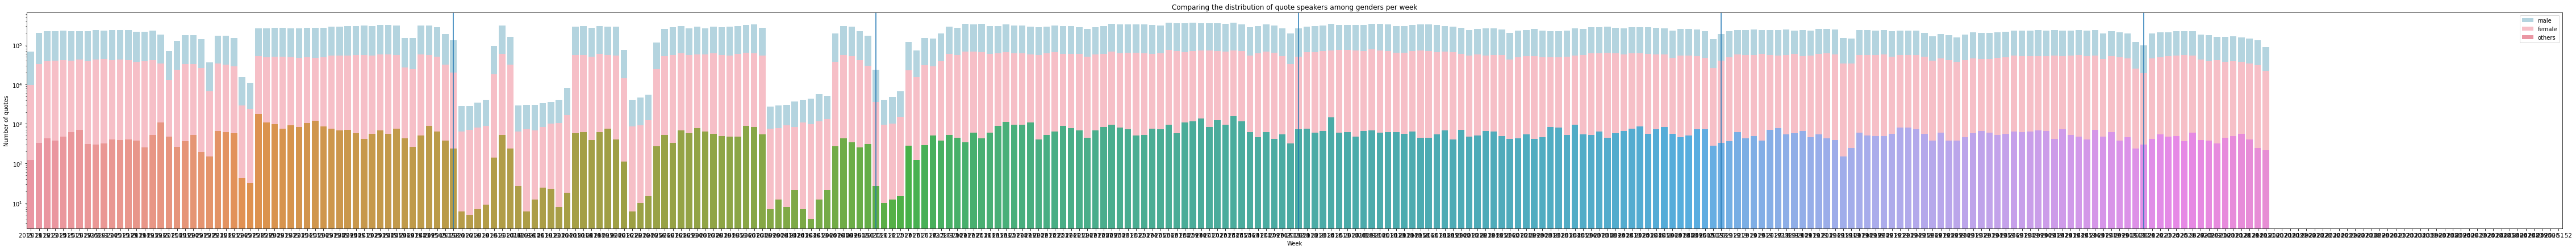

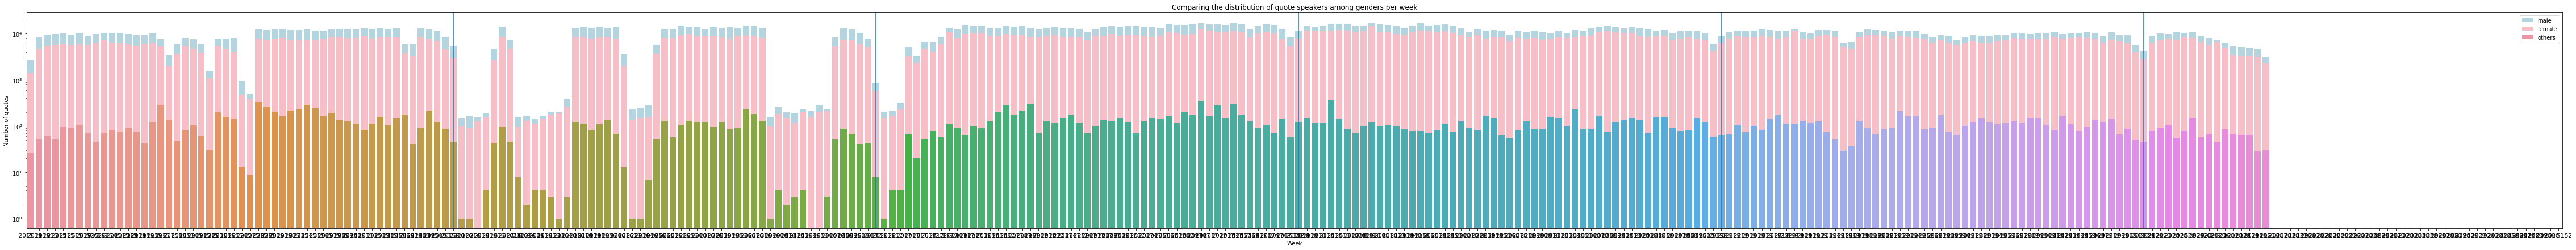

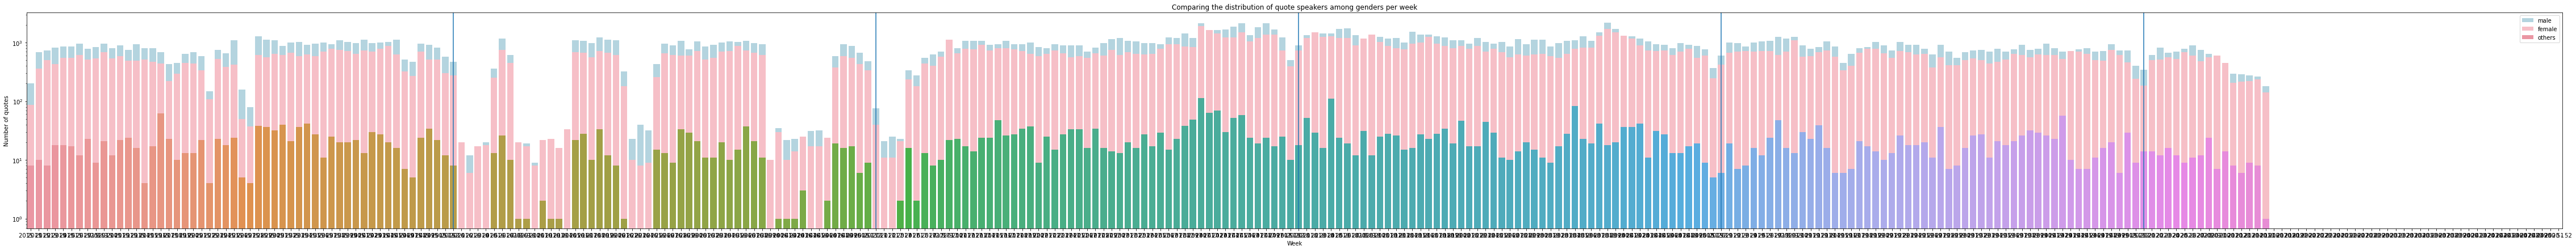

In [39]:
# Plot Weekly datas

years = range(2015, 2020+1)

data_paths = [path_quotebank, path_quote_women, path_quote_metoo]
for data_path in data_paths:
    data_path = data_path[:-9] + '_weekly_count' + data_path[-9:]
    count_paths = [data_path.format(year) for year in years]
    df_counts = []
    for path in count_paths:
        df_counts.append(pd.read_json(path, lines=True).iloc[:-1].set_index('week'))

    df_all = pd.DataFrame()
    week53 = pd.DataFrame(0, index=['0'], columns=df_all.columns)
    week53 = [0]*df_counts[0].shape[1]
    for df, year in zip(df_counts, years):
        df.iloc[0] = [sum(x) for x in zip(df.iloc[0], week53)]
        week53 = df.iloc[-1]
        df['year'] = year
        df['week'] = df.index
        df['idx'] = str(year) + ' - ' + df.index.astype(str)
        df_all = df_all.append(df.iloc[:-1]) # lost week 53 of last year (but as it ends at week 16: OK)
    df_plot = df_all.copy().set_index('idx')

    # PLOT
    ax = sns.barplot(x=df_plot.index, y=df_plot.male,   label='male',   color='lightblue')
    ax = sns.barplot(x=df_plot.index, y=df_plot.female, label='female', color='lightpink')
    ax = sns.barplot(x=df_plot.index, y=df_plot.others, label='others' )
    plt.axvline(x=52) # 2015
    plt.axvline(x=52*2) # 2016
    plt.axvline(x=52*3) # 2017
    plt.axvline(x=52*4) # 2018
    plt.axvline(x=52*5) # 2019

    plt.yscale('log')

    plt.xlabel('Week')
    plt.ylabel('Number of quotes')
    plt.title('Comparing the distribution of quote speakers among genders per week')
    plt.legend()
    plt.rcParams['figure.figsize'] = (80,7)
    plt.show()

On this logarithmic-scale plot, we can clearly see the difference in the importance of each gender in media. The distribution of men and women speakers through time is roughly the same (see correlation below). However, for LGBT+ (other) speakers, they are rarer and seem to speak in peaks which might be correlated with events that happened that week.

### b) Weekly percentage

No handles with labels found to put in legend.


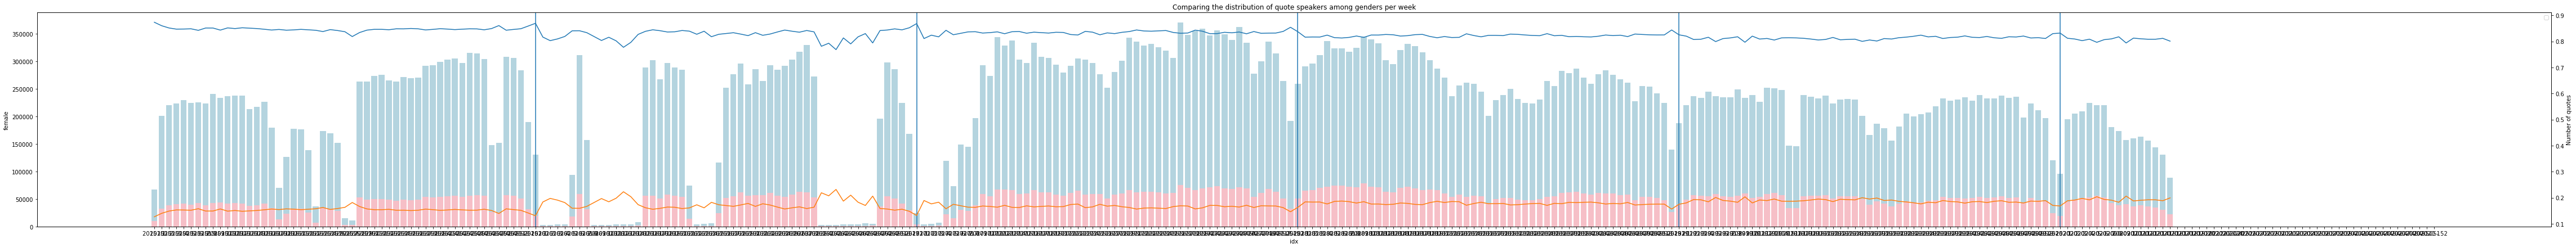

No handles with labels found to put in legend.


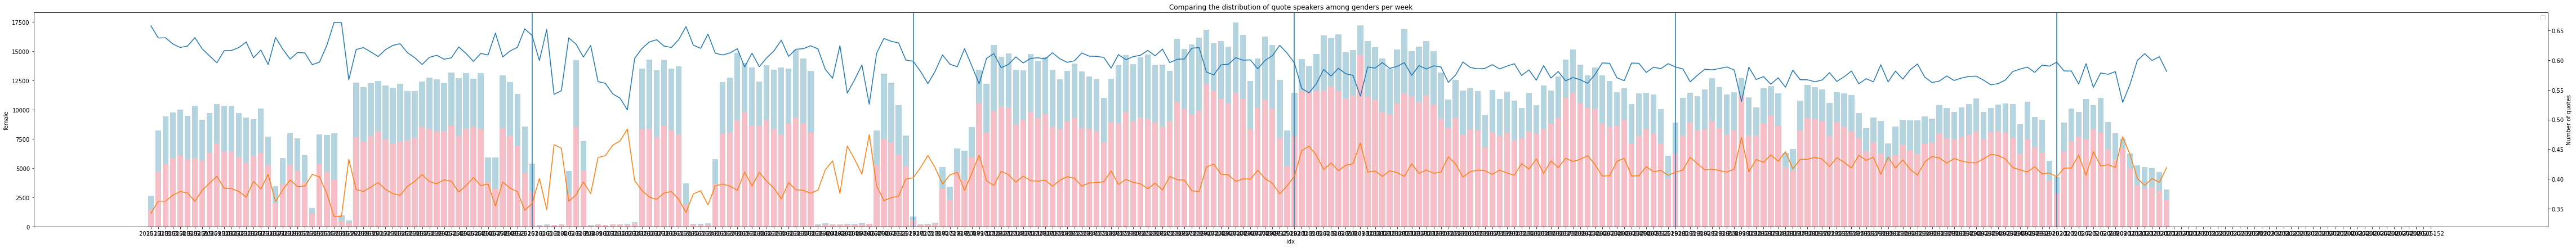

No handles with labels found to put in legend.


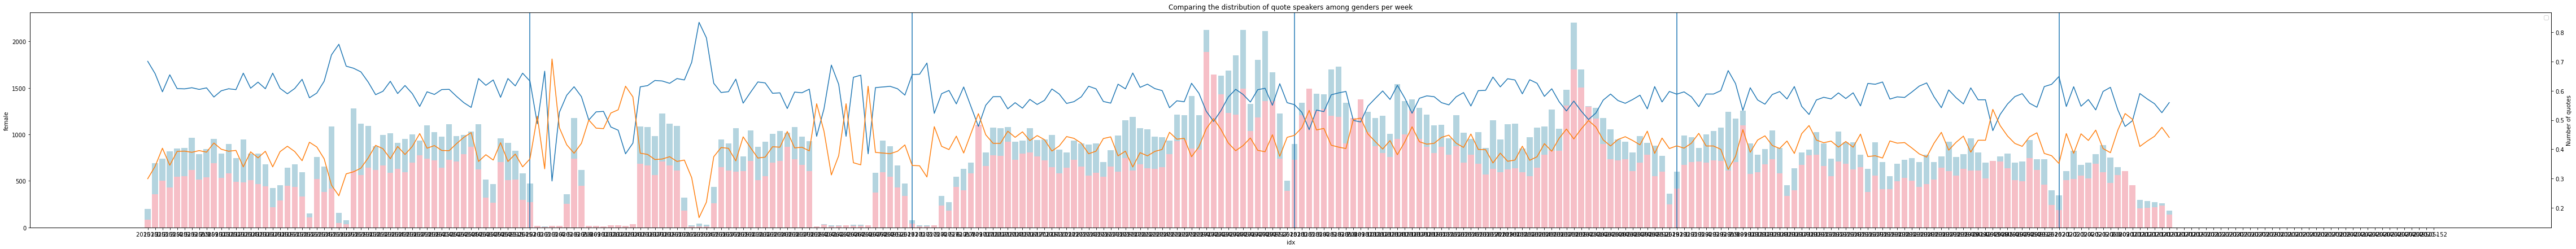

In [40]:
# Women percentage

years = range(2015, 2020+1)

data_paths = [path_quotebank, path_quote_women, path_quote_metoo]
for data_path in data_paths:
    data_path = data_path[:-9] + '_weekly_count' + data_path[-9:]
    count_paths = [data_path.format(year) for year in years]
    df_counts = []
    for path in count_paths:
        df_counts.append(pd.read_json(path, lines=True).iloc[:-1].set_index('week'))

    df_all = pd.DataFrame()
    week53 = pd.DataFrame(0, index=['0'], columns=df_all.columns)
    week53 = [0]*df_counts[0].shape[1]
    for df, year in zip(df_counts, years):
        df.iloc[0] = [sum(x) for x in zip(df.iloc[0], week53)]
        week53 = df.iloc[-1]
        df['year'] = year
        df['week'] = df.index
        df['idx'] = str(year) + ' - ' + df.index.astype(str)
        df_all = df_all.append(df.iloc[:-1]) # lost week 53 of last year (but as it ends at week 16: OK)
    df_plot = df_all.copy().set_index('idx')
    df_all.set_index(['week', 'year'] ,inplace=True)
    
    df_plot['male_female'] = df_plot.male + df_plot.female
    # Might have null denominator -> NAN
    df_plot['percent_male']   = df_plot.male/df_plot.male_female
    df_plot['percent_female'] = df_plot.female/df_plot.male_female

    # PLOT
    plt.axvline(x=52) # 2015
    plt.axvline(x=52*2) # 2016
    plt.axvline(x=52*3) # 2017
    plt.axvline(x=52*4) # 2018
    plt.axvline(x=52*5) # 2019
    ax = sns.barplot(x=df_plot.index, y=df_plot.male,   label='male',   color='lightblue')
    ax = sns.barplot(x=df_plot.index, y=df_plot.female, label='female', color='lightpink')
    ax2 = ax.twinx()
    ax2 = sns.lineplot(data=df_plot.percent_male)
    ax2 = sns.lineplot(data=df_plot.percent_female)

    plt.xlabel('Week')
    plt.ylabel('Number of quotes')
    plt.title('Comparing the distribution of quote speakers among genders per week')
    plt.legend()
    plt.rcParams['figure.figsize'] = (80,7)
    plt.show()

---

*What follow is a more detailed explanation of the __Methods__ paragraph in the __README__*.